需要:執行完`label_encoding_WU.ipynb`產生的`label_encoding.csv`


In [149]:
# !pip  install sklearn
# !pip  install pandas
# !pip install matplotlib
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import cluster
# import time 

# 讀取檔案
- 記得替換檔案路徑
- 主要是把csv檔案讀完後的df:
    - index設回item_id
    - transpose
    - 轉換為numpy

In [150]:
label_data= pd.read_csv('./label_encoding.csv')#use label encoding 
# freq_data= pd.read_csv('../datasets/item_freq_vec.csv')#use tfidf encoding
X1=label_data.to_numpy()
# X2=freq_data.to_numpy()

In [151]:
label_data.head()

,item_id,10_1,11_1,12_1,13_1,14_1,15_1,16_1,17_1,18_1,...,68_1,69_1,6_1,70_1,71_1,72_1,73_1,7_1,8_1,9_1
0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [152]:
# freq_data.head()

In [153]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X1)
X1 = scaler.transform(X1)

# PCA

In [154]:
def pca_model(X_data,n):
    """
    X_data: np array,col:item_id  ,row:feature 
    n : n_components of PCA
    return value: PCA result(array)
    """
    pca = PCA(n_components=n)
    pca.fit(X_data)
    X_pca=pca.transform(X_data)
    print("n_components_:",pca.n_components_)
    print("explained_variance_ratio_:",pca.explained_variance_ratio_)
    print("singular_values_:",pca.singular_values_)
    return  X_pca

In [155]:
X1_pca=pca_model(X1,2)
# scaler = StandardScaler().fit(X1_pca)
# X1_pca = scaler.transform(X1_pca)
# print(X1_pca.shape)
print("--------")
# X2_pca=pca_model(X2,2)
# print(X2_pca.shape)
# print('--------')

n_components_: 2
explained_variance_ratio_: [0.18665672 0.10046762]
singular_values_: [620.25908527 455.055519  ]
--------


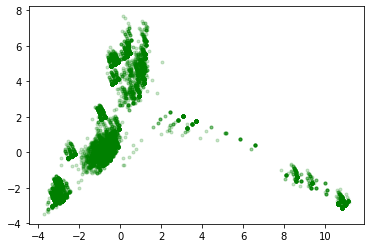

In [156]:
plt.scatter(X1_pca[:,0],X1_pca[:,1],c="g",marker='.',alpha=0.2)
plt.show()

In [157]:
# plt.scatter(X2_pca[:,0],X2_pca[:,1],c="g",marker='.',alpha=0.2)
# plt.show()

In [158]:
X1_pca_t = np.where((X1_pca[:, 1]>2.3))
X1_pca_m = np.where((X1_pca[:, 1]<2.3)&(X1_pca[:, 1]>-0.9))
X1_pca_b = np.where((X1_pca[:, 1]<-0.9))

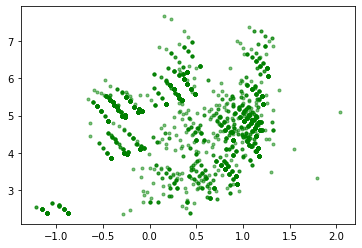

In [159]:
plt.scatter(X1_pca[X1_pca_t][:,0],X1_pca[X1_pca_t][:,1],c="g",marker='.',alpha=0.5)
plt.show()

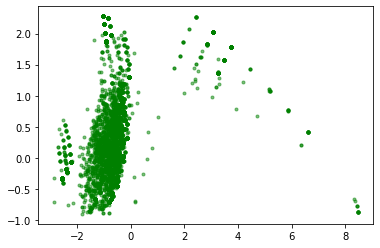

In [160]:
plt.scatter(X1_pca[X1_pca_m][:,0],X1_pca[X1_pca_m][:,1],c="g",marker='.',alpha=0.5)
plt.show()

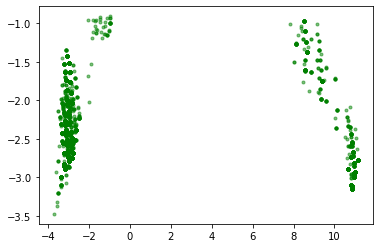

In [161]:
plt.scatter(X1_pca[X1_pca_b][:,0],X1_pca[X1_pca_b][:,1],c="g",marker='.',alpha=0.5)
plt.show()

# Clustering
## DBSCAN

In [162]:
# ax = plt.figure().gca()
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
def DBSCAN_draw(data,eps,min_sample, print_group_info=True,draw=True):
    """
    data :            要進行clustering 的np array 
    eps,min_sample :  DBSCAN之參數
    print_group_info: Bool,是否要顯示每個分群中資料的筆數
    draw:             Bool,是否要畫圖
    return :          DBSM 結果
    """
    clustering = DBSCAN(eps=eps, min_samples=min_sample).fit(data)
    label=list(clustering.labels_)
    group_list=[]
    count_list=[]
    
    fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    # ax1=ax[0]
    # ax2=ax[1]
    if print_group_info==True:
        for i in set(label):
            print("label:",i,"\tcount:",label.count(i))
            group_list.append(str(i))
            count_list.append(label.count(i))

        ax2.bar(group_list,count_list)
        # ax2.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

        # ax2.gca().yaxis.set_major_locator(MaxNLocator(integer=True))


        ax2.set_title(f"Distrubution ")
        ax2.set_xlabel('Group ID')
        ax2.set_ylabel('Counts')
        ax2.set_ylim([0, 16300])
    
    if draw==True:
        plt.subplot(122) 
        group =clustering.labels_
        # fig, ax = plt.subplots()
        for g in np.unique(group):
            ix = np.where(group == g)
            ax1.scatter(data[:,0][ix], data[:,1][ix], label = g, s = 10)
        ax1.legend()
        ax1.set_title(f"DBSCAN on item (eps={eps},min_sample={min_sample})")
        fig.show()
    plt.savefig(f"img/i_DBSCAN_eps{eps}_min_sample{min_sample}.jpg")
    return clustering

label: 0 	count: 20418
label: 1 	count: 2567
label: 2 	count: 686
label: -1 	count: 20


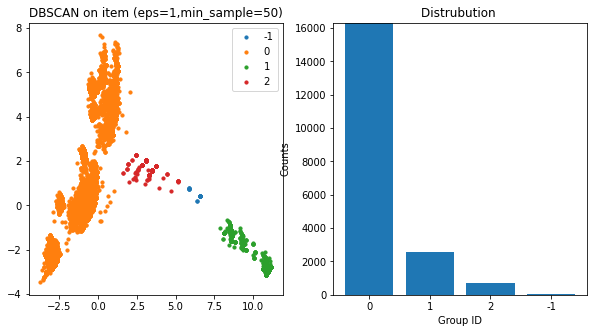

In [163]:
aDBSCAN_PCA_result=DBSCAN_draw(X1_pca,eps=1,min_sample=50)
# 6 5

In [164]:
# aDBSCAN_PCA_result=DBSCAN_draw(X2_pca,eps=6,min_sample=5)

## Kmeans

In [165]:
def Kmeans_draw(data,n_clusters, print_group_info=True,draw=True):
    """
    data :            要進行clustering 的np array 
    n_clusters :      Kmeans要分幾群
    print_group_info: Bool,是否要顯示每個分群中資料的筆數
    draw:             Bool,是否要畫圖
    return :          Kmeans 結果
    """
    clustering = cluster.KMeans(n_clusters = n_clusters).fit(data)
    label=list(clustering.labels_)
    group_list=[]
    count_list=[]
    fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    
    if print_group_info==True:
        for i in set(label):
            print("label:",i,"\tcount:",label.count(i))
            group_list.append(str(i))
            count_list.append(label.count(i))
        ax2.bar(group_list,count_list)
        ax2.set_title(f"Distrubution ")
        ax2.set_xlabel('Group ID')
        ax2.set_ylabel('Counts')
    
    if draw==True:
        group =clustering.labels_
        # fig, ax = plt.subplots()
        for g in np.unique(group):
            ix = np.where(group == g)
            ax1.scatter(data[:,0][ix], data[:,1][ix], label = g, s = 10)
        ax1.legend()
        ax1.set_title(f"Kmeans on item (n_clusters={n_clusters})")
        # fig.show()
   
        ax1.legend()
        fig.show()
        plt.savefig(f"img/Kmeans{n_clusters}.jpg")
    return clustering

label: 0 	count: 6761
label: 1 	count: 4962
label: 2 	count: 2567
label: 3 	count: 8695
label: 4 	count: 706


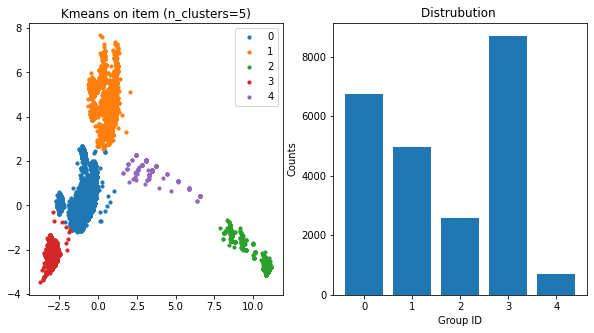

In [166]:
Kmeans_result=Kmeans_draw(X1_pca,n_clusters=5)

label: 0 	count: 7110
label: 1 	count: 13994
label: 2 	count: 2587


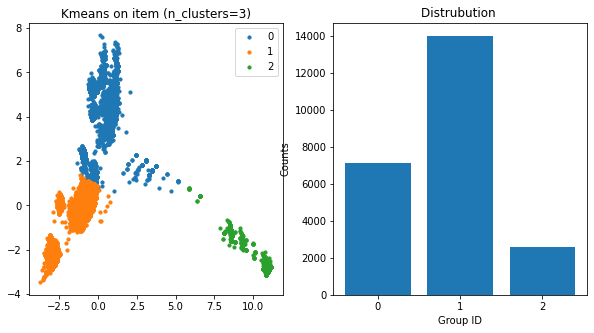

In [167]:
Kmeans_result=Kmeans_draw(X1_pca,n_clusters=3)

In [168]:
# Kmeans_result=Kmeans_draw(X2_pca,n_clusters=3)

# 將label 結果儲存
- 將分群結果儲存
    - 需要使用讀檔的`label_encoding.csv`來取出feature對應的label


In [246]:
DBSCAN_labels=DBSCAN_draw(X_pca_n2,eps=5,min_sample=3,print_group_info=False,draw=False).labels_
Kmeans_labels=Kmeans_draw(X_pca_n2,n_clusters=3,print_group_info=False,draw=False).labels_
label=label_data.item_id  #取出feature對應的label
res=pd.DataFrame()
res['label']=label
res['DBSCAN']=DBSCAN_lebals
res['Kmeans']=Kmeans_lebals

#res.to_csv("cluster_on_item.csv")

In [247]:
res

,label,DBSCAN,Kmeans
0,2,0,1
1,3,0,1
2,4,0,1
3,7,0,1
4,8,0,1
...,...,...,...
23686,28139,28,2
23687,28140,28,2
23688,28141,28,2
23689,28142,28,2
